<h1 style="padding: 25px 25px; background-color: #3498DB; font-family: Sans-Serif; color:white; text-align: center">
Project: Twitter Hate Speech Detection</h1>

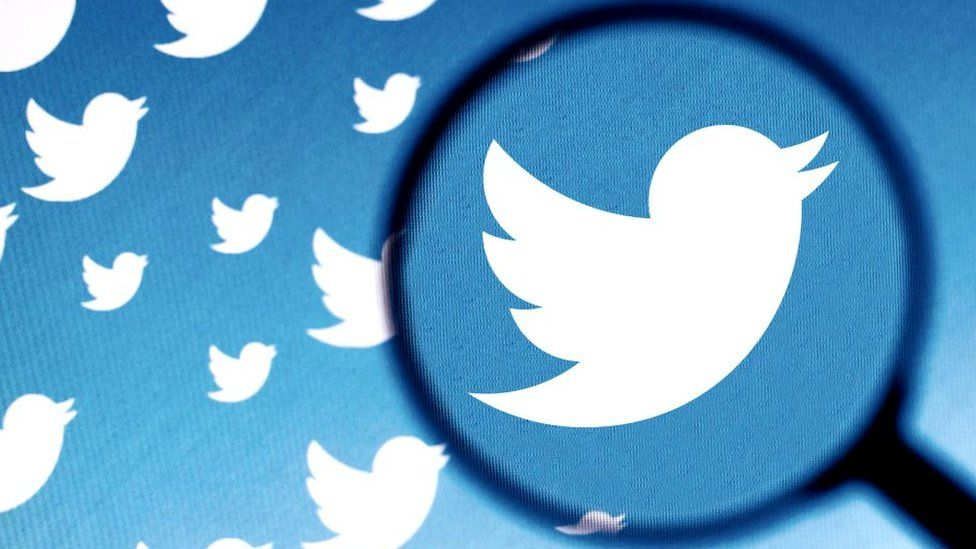

<h3 style="padding: 12px 12px; background-color: #85C1E9; font-family: Sans-Serif; color:white">
fdsfds</h3>

<h4 style="border-bottom: 3px solid #85C1E9;padding: 12px 12px; font-family: Sans-Serif; color:black">
H4</h4>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#
fdsfds" data-toc-modified-id="
fdsfds-0.1">
fdsfds</a></span><ul class="toc-item"><li><span><a href="#
H4" data-toc-modified-id="
H4-0.1.1">
H4</a></span></li></ul></li></ul></li><li><span><a href="#
Problem-description" data-toc-modified-id="
Problem-description-1">
Problem description</a></span></li><li><span><a href="#
Data-Overview" data-toc-modified-id="
Data-Overview-2">
Data Overview</a></span></li><li><span><a href="#
Import-modules" data-toc-modified-id="
Import-modules-3">
Import modules</a></span></li><li><span><a href="#
Configuration" data-toc-modified-id="
Configuration-4">
Configuration</a></span></li><li><span><a href="#
Auxilary-Functions" data-toc-modified-id="
Auxilary-Functions-5">
Auxilary Functions</a></span></li><li><span><a href="#
Load-Data" data-toc-modified-id="
Load-Data-6">
Load Data</a></span></li><li><span><a href="#
EDA" data-toc-modified-id="
EDA-7">
EDA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#
NA-values" data-toc-modified-id="
NA-values-7.0.1">
NA values</a></span></li><li><span><a href="#
Duplicates" data-toc-modified-id="
Duplicates-7.0.2">
Duplicates</a></span></li><li><span><a href="#
Class-Balance" data-toc-modified-id="
Class-Balance-7.0.3">
Class Balance</a></span></li><li><span><a href="#
Text-Cleaning-Overview" data-toc-modified-id="
Text-Cleaning-Overview-7.0.4">
Text Cleaning Overview</a></span></li></ul></li></ul></li></ul></div>

<h2 style="padding: 12px 12px; background-color: #3498DB; font-family: Sans-Serif; color:white">
Problem description</h2>

Hate speech detection is a problem of sentiment classification. The task is to
classify certain piece of text as the one with hate speech or not, by training deep
learning model on labeled data.

The term hate speech is understood as any type of verbal, written or
behavioral communication that attacks or uses derogatory or discriminatory
language against a person or group based on what they are, in other words, based
on their religion, ethnicity, nationality, race, color, ancestry, sex or another identity
factor.

<h2 style="padding: 12px 12px; background-color: #3498DB; font-family: Sans-Serif; color:white">
Data Overview</h2>

There are two `csv` format datasets in available:

- **train.csv** - with `id`, `tweet` with text and `label` - 1 for hate-speech and 0 - otherwise 



- **test.csv** - with `id`, `tweet` with text 

<h2 style="padding: 12px 12px; background-color: #3498DB; font-family: Sans-Serif; color:white">
Import modules</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import time

<h2 style="padding: 12px 12px; background-color: #3498DB; font-family: Sans-Serif; color:white">
Configuration</h2>

In [2]:
plt.style.use(style='seaborn')
warnings.filterwarnings("ignore")

RANDOM_STATE = 12345

TRAIN_DATA = '../dataset/train.csv'
TEST_DATA = '../dataset/test.csv'

<h2 style="padding: 12px 12px; background-color: #3498DB; font-family: Sans-Serif; color:white">
Auxilary Functions</h2>

<h2 style="padding: 12px 12px; background-color: #3498DB; font-family: Sans-Serif; color:white">
Load Data</h2>

- Train dataset

In [3]:
train_df = pd.read_csv(TRAIN_DATA)

train_df.info()
display(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


- Test dataset

In [4]:
test_df = pd.read_csv(TEST_DATA)

test_df.info()
display(test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


<h2 style="padding: 12px 12px; background-color: #3498DB; font-family: Sans-Serif; color:white">
EDA</h2>

<h4 style="border-bottom: 3px solid #85C1E9;padding: 12px 12px; font-family: Sans-Serif; color:black">
NA values</h4>

In [5]:
train_df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

- There are no `NA` values in train data

<h4 style="border-bottom: 3px solid #85C1E9;padding: 12px 12px; font-family: Sans-Serif; color:black">
Duplicates</h4>

In [6]:
print(f'Number of duplcates: {train_df.duplicated().sum()}')

Number of duplcates: 0


- There are no `duplicates` in train data

<h4 style="border-bottom: 3px solid #85C1E9;padding: 12px 12px; font-family: Sans-Serif; color:black">
Class Balance</h4>

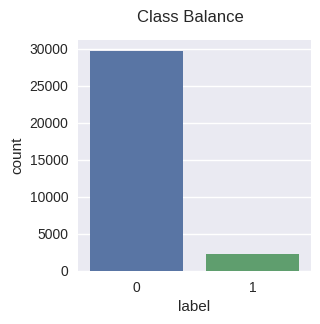

Percent of positive tweets: 93%
Percent of negative tweets: 7%


In [28]:
fig, ax = plt.subplots(figsize=(3,3))
fig.suptitle('Class Balance')
sns.countplot(data=train_df, x='label', ax=ax)
plt.show()

print('Percent of positive tweets: {:.0%}'.format(1-train_df['label'].sum()/len(train_df)))
print('Percent of negative tweets: {:.0%}'.format(train_df['label'].sum()/len(train_df)))

- Data has significant class imbalance:
    - `93%` of tweets are `positive` 
    - `7%` of tweets are `negative` 


- Imbalance in data could lead to bias in our model


- To counter imbalance during training we can use following techniques:

    1. Downsample the `majority` class
    2. Upsample the `minority` class
    3. Use `weights` for the classes at the algorithmic level
    4. Use `stratified` cross-validation

<h4 style="border-bottom: 3px solid #85C1E9;padding: 12px 12px; font-family: Sans-Serif; color:black">
Text Cleaning Overview</h4>

In [33]:
train_df[['tweet']].head(10)

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
5,[2/2] huge fan fare and big talking before the...
6,@user camping tomorrow @user @user @user @use...
7,the next school year is the year for exams.ð...
8,we won!!! love the land!!! #allin #cavs #champ...
9,@user @user welcome here ! i'm it's so #gr...


- For cleaning text data we will perform following steps:

    1. Remove symbols, digits, extra spaces using regular expressions
    2. Remove `URLs` using regular expressions
    3. Normalize casing
    4. Tokenize sentences into individual terms, using tokenizers
    5. Remove stop words